Lo primero que hacemos es dividir el dataset original en dos partes. 
<BR>

i) Incluye los nulos (10.415) que será donde hagamos las prediciones.
<BR>

ii) No incluye los nulos (21.229) y será el que utilicemos para entrenar el modelo.  

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/data.csv')

data_copia = data.copy()

# Crear un DataFrame con filas que contienen NaN en 'x_e_out [-]'

df_nan = data_copia[data_copia['x_e_out [-]'].isnull()]

# Crear un DataFrame sin filas que contienen NaN en 'x_e_out [-]'

df_sin_nan = data_copia[~data_copia['x_e_out [-]'].isnull()]

print("Data_copia: ", data_copia.shape)
print("Data con los NUN:", df_nan.shape)
print("Data sin los NUN: ", df_sin_nan.shape)

Data_copia:  (31644, 10)
Data con los NUN: (10415, 10)
Data sin los NUN:  (21229, 10)


In [2]:
# Calcular la media de la columna "x_e_out [-]"
media_x_e_out = df_sin_nan['x_e_out [-]'].mean()

print("Media de x_e_out [-]:", media_x_e_out)

Media de x_e_out [-]: -0.0004528625936219324


In [3]:
# Realizar la codificación one-hot en la columna "author" y "geometry". 

data_encoded = pd.get_dummies(df_sin_nan, columns=['author', "geometry"])

data_encoded.head(2)

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],author_Beus,author_Inasaka,...,author_Kossolapov,author_Mortimore,author_Peskov,author_Richenderfer,author_Thompson,author_Weatherhead,author_Williams,geometry_annulus,geometry_plate,geometry_tube
0,0,7.0,3770.0,0.1754,NaN,10.8,432.0,3.6,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2,0,0,...,0,0,0,0,1,0,0,0,0,1


# Probamos el modelo de Ramdom Forest 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Reemplazar los valores faltantes con la media de la columna correspondiente
data_encoded.fillna(data_encoded.mean(), inplace=True)

# Separar las características (X) y la variable objetivo (y)
X = data_encoded.drop('x_e_out [-]', axis=1)
y = data_encoded['x_e_out [-]']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto Scaler y ajustarlo a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de Random Forest
modelo_RF = RandomForestRegressor()
modelo_RF.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_RF.predict(X_test_scaled)

# Calcular el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular el R cuadrado
r2 = r2_score(y_test, y_pred)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 0.07744844465600988
R-squared: 0.4094800760484789
Mean Squared Error (MSE): 0.005998261579635025
Mean Absolute Error (MAE): 0.05398208153556288


# Gráfico de barras que resuma las métricas de evaluación, como RMSE, MSE y MAE

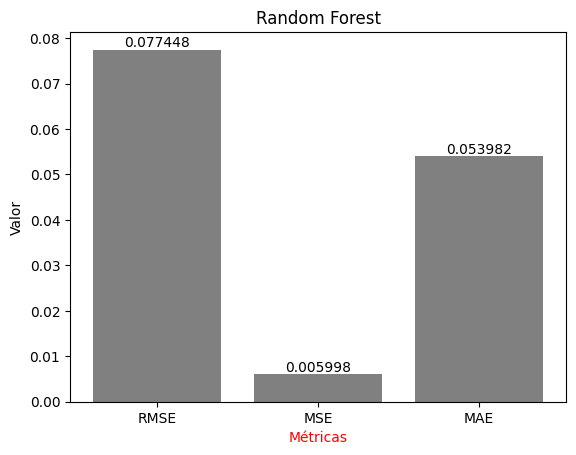

In [8]:
# Definir las métricas y sus valores
metricas = ['RMSE', 'MSE', 'MAE']
valores = [rmse, mse, mae]  # Asegúrate de tener los valores reales de las métricas

# Crear el gráfico de barras
plt.bar(metricas, valores, color="gray")
plt.xlabel('Métricas', color="red")
plt.ylabel('Valor')
plt.title('Random Forest')

# Agregar los valores sobre las barras
for i, valor in enumerate(valores):
    plt.text(i, valor, str(round(valor, 6)), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()




# Comparación del R2 de XGBoost y Random Forest

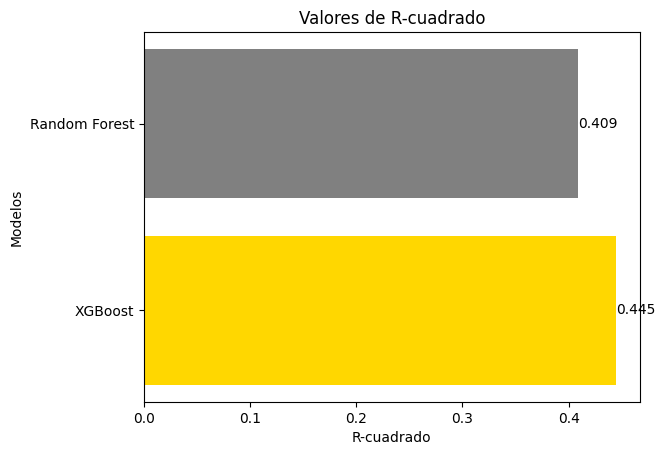

In [10]:
import matplotlib.pyplot as plt

# Valores de R-cuadrado
xgboost_r_squared = 0.44486807699061515
random_forest_r_squared = 0.4090267061555636

# Etiquetas para las barras
labels = ['XGBoost', 'Random Forest']

# Alturas de las barras
heights = [xgboost_r_squared, random_forest_r_squared]

# Colores de las barras
colors = ['gold', 'gray']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras horizontales
bar_plot = ax.barh(labels, heights, color=colors)

# Configurar título y etiquetas de los ejes
ax.set_title('Valores de R-cuadrado')
ax.set_xlabel('R-cuadrado')
ax.set_ylabel('Modelos')

# Mostrar los valores sobre las barras
for i, bar in enumerate(bar_plot):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{width:.3f}', ha='left', va='center')

# Mostrar la gráfica
plt.show()

# Realizamos graficos de dispersión para comparar los valores reales y la predicción 

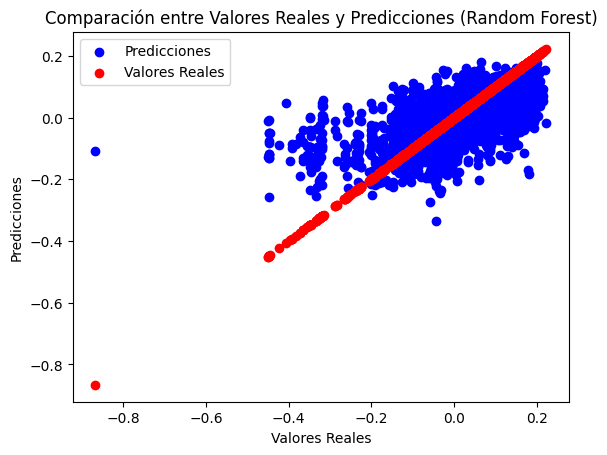

In [8]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.scatter(y_test, y_pred, c='b', label='Predicciones')  # Puntos azules para predicciones
plt.scatter(y_test, y_test, c='r', label='Valores Reales')  # Puntos rojos para valores reales
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones (Random Forest)')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


# Gráfico de Residuos

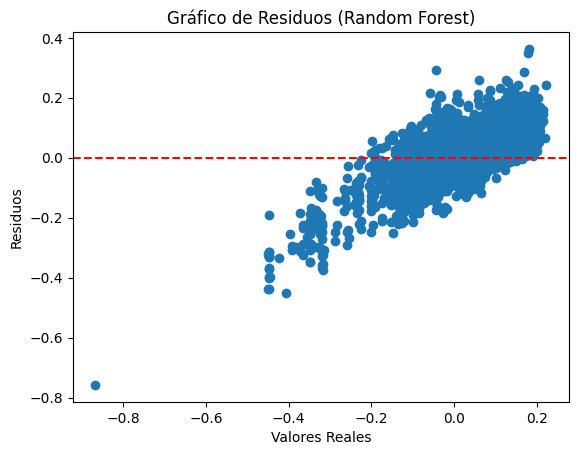

In [9]:
import matplotlib.pyplot as plt

# Calcular los residuos
residuos = y_test - y_pred

# Crear el gráfico de residuos
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='--')  # Agregar una línea horizontal en 0 para referencia
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos (Random Forest)')

# Mostrar el gráfico
plt.show()


# Ponemos en el mismo formato el dataset NAN y hacemos la predicción. 

In [6]:
# Realizar la codificación one-hot en la columna "author" y "geometry"

data_encoded_NUN = pd.get_dummies(df_nan, columns=['author', "geometry"])

# Reemplazar los valores faltantes con la media de la columna correspondiente
data_encoded_NUN.fillna(data_encoded_NUN.mean(), inplace=True)

# Separar las características (X_new) del nuevo DataFrame
X_new = data_encoded_NUN.drop('x_e_out [-]', axis=1)

# Escalar los datos del nuevo DataFrame utilizando el mismo objeto Scaler ajustado previamente
X_new_scaled = scaler.transform(X_new)

# Realizar la predicción en el nuevo DataFrame
y_new_pred = modelo_RF.predict(X_new_scaled)

# Agregar los valores predichos al nuevo DataFrame
data_encoded_NUN['x_e_out [-]'] = y_new_pred

# Imprimir el nuevo DataFrame con los valores predichos

formato_subm = data_encoded_NUN[['id', 'x_e_out [-]']]

# Convertir el DataFrame seleccionado a CSV
formato_subm.to_csv('Submission_5.csv', index=False)
